## APPLIED STATISTICS

### Turma 10DTSR


## Trabalho prático usando o Python

## Habilidades desenvolvidas: Detecção de outliers.



### Instalar as bibliotecas pandas, numpy, matplotlib e seaborn

In [1]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
# Importar a base de dados
cadastro = pd.read_csv('cadastro.csv')

In [5]:
# Visualizar os dados
cadastro.head()

,Unnamed: 0,NUM_CPF,CHAVE_CONTRATO,DATA_NASCIMENTO,RENDA_PRESUMIDA,CEP,LOGRADOURO,NUMERO,COMPLEMENTO,CEP_A,...,NUM_AGENCIA,NUM_CONTA,MARCA_VEICULO,MODELO_VEICULO,PLACA_VEICULO,CNPJ_CREDOR,VALOR_DIVIDA,STATUS_CONSENTIMENTO,DATA_INCLUSAO1,IDADE
0,1,40977545806,1,25/09/1996,1890000.00,2471020,R AUGUSTO VIANA DE CASTELO,26.0,NaN,2471020,...,NaN,NaN,NaN,NaN,NaN,3.774819e+12,220,1,2/26/2019 11:28:49,23.0
1,2,72544350725,2,10/03/1961,1333890.24,1319001,R MARIA PAULA,201.0,AP 52,1319001,...,6571.0,15044.0,FERRARI,355 SPIDER,AFZ6118,4.043254e+13,850,1,2/7/2001 0:00:00,40.0
2,3,10536099812,3,28/11/1965,22000.00,4323120,R DAS JOIAS,202.0,VL DO,4323120,...,7006.0,52946.0,NaN,NaN,NaN,6.169523e+13,142,1,8/23/2018 6:42:12,53.0
3,4,1471742873,4,02/05/1959,16000.00,4136030,R GUARAREMA,430.0,NaN,4136030,...,1850.0,1103486.0,NaN,NaN,NaN,NaN,0,1,NaN,NaN
4,5,954396332,5,10/11/1984,15929.00,8452105,R JOAO DE SIQUEIRA AFONSO,709.0,CAS,8452105,...,123.0,580882.0,NaN,NaN,NaN,3.510965e+13,400,1,11/24/2010 10:30:45,26.0


In [7]:
# Tipos de variáveis
cadastro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            426 non-null    int64  
 1   NUM_CPF               426 non-null    int64  
 2   CHAVE_CONTRATO        426 non-null    int64  
 3   DATA_NASCIMENTO       426 non-null    object 
 4   RENDA_PRESUMIDA       426 non-null    float64
 5   CEP                   426 non-null    int64  
 6   LOGRADOURO            426 non-null    object 
 7   NUMERO                425 non-null    float64
 8   COMPLEMENTO           206 non-null    object 
 9   CEP_A                 426 non-null    int64  
 10  BAIRRO                390 non-null    object 
 11  CIDADE                426 non-null    object 
 12  UF                    426 non-null    object 
 13  LATITUDE              389 non-null    float64
 14  LONGITUDE             389 non-null    float64
 15  DDD_CELULAR           2

In [9]:
cadastro.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,426.0,2.135000e+02,1.231199e+02,1.000000e+00,1.072500e+02,2.135000e+02,3.197500e+02,4.260000e+02
NUM_CPF,426.0,2.683050e+10,1.913585e+10,9.470051e+07,1.086907e+10,2.604114e+10,3.579893e+10,9.992102e+10
CHAVE_CONTRATO,426.0,2.135000e+02,1.231199e+02,1.000000e+00,1.072500e+02,2.135000e+02,3.197500e+02,4.260000e+02
RENDA_PRESUMIDA,426.0,1.038781e+04,1.117839e+05,0.000000e+00,2.068500e+03,2.431580e+03,2.923545e+03,1.890000e+06
CEP,426.0,4.635212e+06,1.978839e+06,1.007020e+06,3.153250e+06,4.323120e+06,5.644782e+06,8.490018e+06
NUMERO,425.0,5.952871e+02,4.869597e+03,3.000000e+00,5.800000e+01,1.640000e+02,4.300000e+02,9.999900e+04
CEP_A,426.0,4.635212e+06,1.978839e+06,1.007020e+06,3.153250e+06,4.323120e+06,5.644782e+06,8.490018e+06
LATITUDE,389.0,-2.357658e+01,8.417755e-02,-2.380206e+01,-2.363061e+01,-2.356434e+01,-2.350625e+01,-2.343125e+01
LONGITUDE,389.0,-4.660483e+01,1.139617e-01,-4.680850e+01,-4.668348e+01,-4.663475e+01,-4.651564e+01,-4.638065e+01
DDD_CELULAR,275.0,1.650182e+01,1.777975e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,9.800000e+01


## Histograma e o Boxplot

### são gráficos que representam a distribuição de um conjunto de dados
### O histograma é um gráfico de "barras", enquanto o boxplot é um diagrama de caixa


### Histograma

#### Representa a distribuição de frequências
#### A base de cada barra representa uma classe 
#### A altura de cada barra representa a frequência absoluta de cada classe
#### É útil para visualizar a distribuição dos dados como um todo
#### Pode ser usado para verificar se os dados se aproximam de uma distribuição normal. 


### Histograma

#### Representa a distribuição de um conjunto de dados
#### Também é conhecido como "Diagrama de Caixa"
#### Resume cinco estatísticas: valor mínimo, primeiro quartil, mediana, terceiro quartil e valor máximo
#### É útil para identificar a existência de outliers (valores discrepantes) 
#### Pode ser usado para analisar a posição, a dispersão, a simetria, as caudas e os outliers dos dados. 
 

In [21]:
# Imputação de dados faltantes usando a média
cadastro['Idade_i'] = cadastro['IDADE'].fillna(value=cadastro['IDADE'].median())


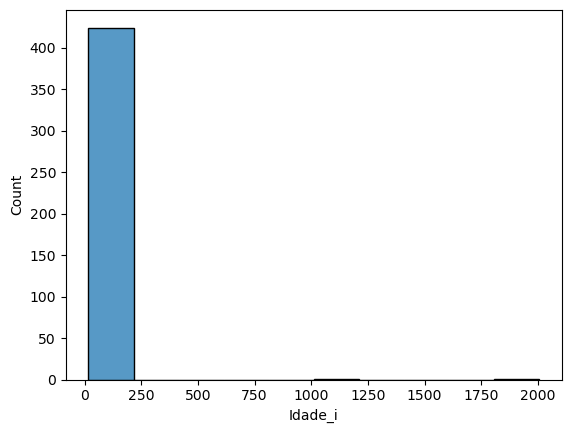

In [23]:
import seaborn as sns

sns.histplot(x="Idade_i", data=cadastro, bins=10);

In [25]:
# Uma opção sobre como eliminar outliers é achatamento de algum valor descrepante

cadastro.loc[cadastro["Idade_i"]>=1000, "Idade_i"] = 100  

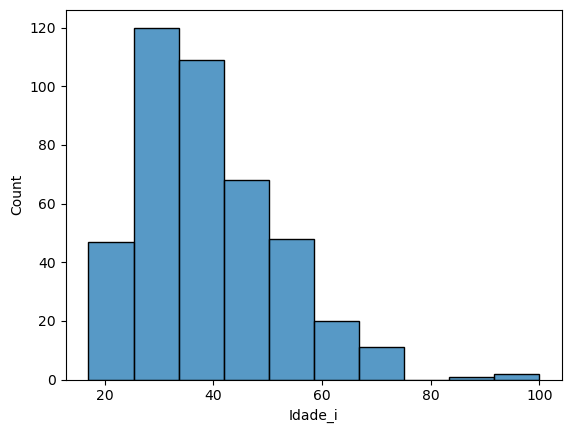

In [27]:
# Histograma da variável Idade
# O Box Plot (desenho esquemático) informa medidas de posição, dispersão, assimetria, caudas e dados atípicos (outliers).
#     A posição central é dada pela mediana e a dispersão pela amplitude inter-quartílica. 
#     As medidas de posição q1, q2 e q3 informam a assimetria da distribuição. 
#     Os comprimentos das caudas são dados pelas linhas que vão do retângulo aos valores distantes e pelos valores atípicos.


sns.histplot(x="Idade_i", data=cadastro, bins=10);

<Axes: ylabel='Idade_i'>

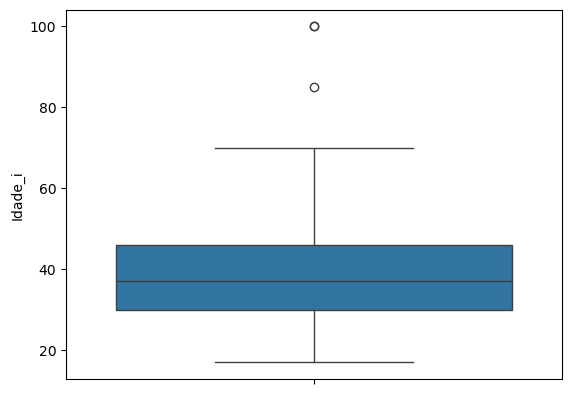

In [29]:
# Box Plot
sns.boxplot(y="Idade_i", data=cadastro)

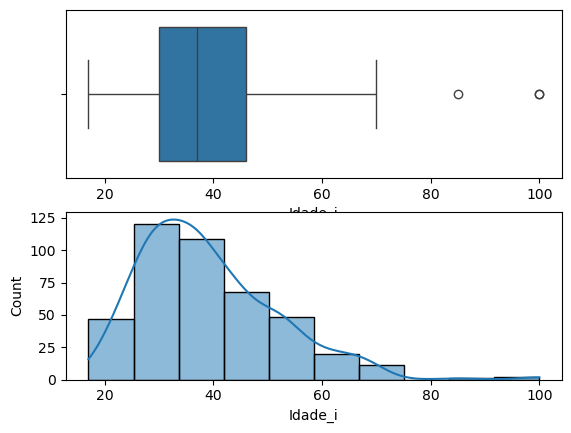

In [31]:

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

sns.boxplot(x="Idade_i", data=cadastro, ax=ax1)
sns.histplot(x="Idade_i", data=cadastro, bins=10, kde=True, ax=ax2)

plt.show()

In [33]:
cadastro["Idade_i"].describe()

count    426.000000
mean      38.997653
std       12.595330
min       17.000000
25%       30.000000
50%       37.000000
75%       46.000000
max      100.000000
Name: Idade_i, dtype: float64

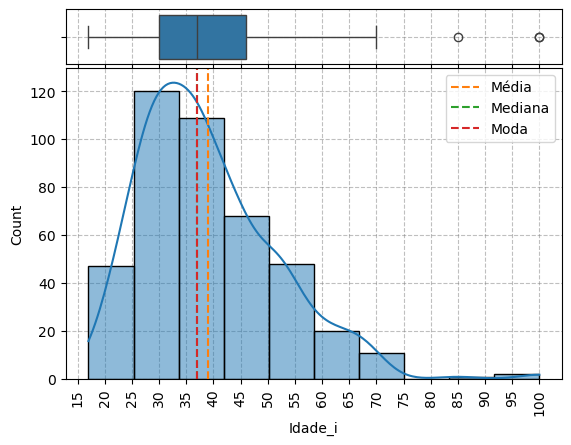

In [35]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, (ax1, ax2) = plt.subplots(
    nrows=2,
    ncols=1,
    sharex=True,
    gridspec_kw={"height_ratios": (0.15, 0.85), "hspace": 0.02},
)

sns.boxplot(x="Idade_i", data=cadastro, ax=ax1)
sns.histplot(x="Idade_i", data=cadastro, bins=10, kde=True, ax=ax2)

ax2.xaxis.set_major_locator(mtick.MultipleLocator(base=5.0))
ax2.tick_params(axis="x", rotation=90)

for ax in (ax1, ax2):
    ax.grid(True, linestyle="--", color="gray", alpha=0.5)
    ax.set_axisbelow(True)

ax2.axvline(cadastro["Idade_i"].mean(), color="C1", linestyle="--", label="Média")
ax2.axvline(cadastro["Idade_i"].median(), color="C2", linestyle="--", label="Mediana")
ax2.axvline(cadastro["Idade_i"].mode()[0], color="C3", linestyle="--", label="Moda")

ax2.legend()

plt.show()

## Analisando a Variável renda Presumida

In [37]:
cadastro["RENDA_PRESUMIDA"].describe()

count    4.260000e+02
mean     1.038781e+04
std      1.117839e+05
min      0.000000e+00
25%      2.068500e+03
50%      2.431580e+03
75%      2.923545e+03
max      1.890000e+06
Name: RENDA_PRESUMIDA, dtype: float64

In [39]:
pd.set_option('display.float_format','{:.2f}'.format)

In [41]:
cadastro["RENDA_PRESUMIDA"].describe()

count       426.00
mean      10387.81
std      111783.91
min           0.00
25%        2068.50
50%        2431.58
75%        2923.55
max     1890000.00
Name: RENDA_PRESUMIDA, dtype: float64

Text(0.5, 1.0, 'Histograma da renda presumida')

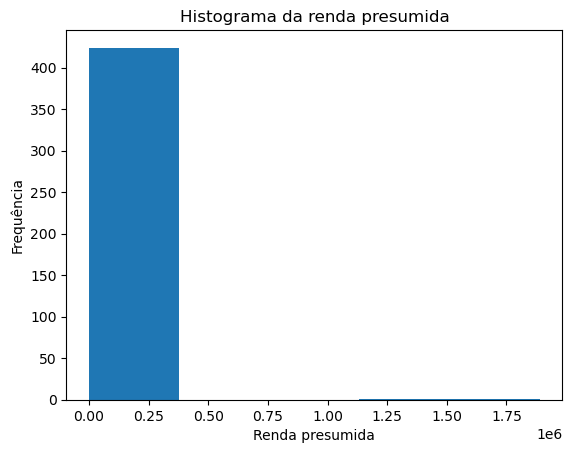

In [43]:
# Histograma da variável Renda presumida
plt.hist(cadastro['RENDA_PRESUMIDA'], bins=5)
plt.ylabel('Frequência')
plt.xlabel('Renda presumida')
plt.title('Histograma da renda presumida')

<Axes: ylabel='RENDA_PRESUMIDA'>

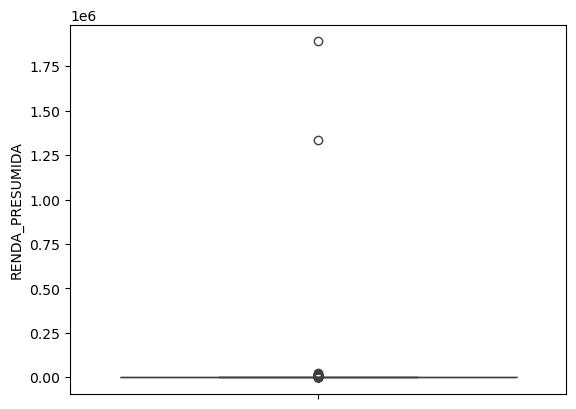

In [45]:
# Box Plot
sns.boxplot(y="RENDA_PRESUMIDA", data=cadastro)

## Análise de detecção de outliers usando o Box Plot


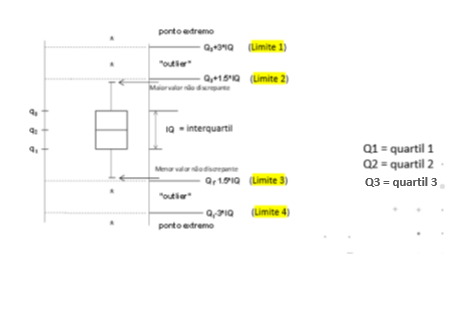

## Cálculo dos limites que definem outliers e pontos extremos do Box Plot

## Medidas de posição

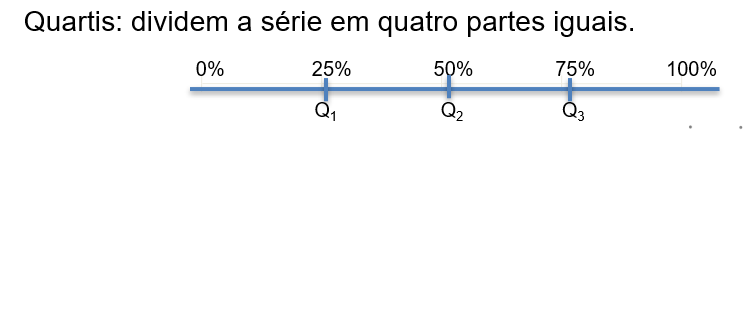

### Variável de análise: RENDA_PRESUMIDA

In [47]:
# Cálculo do mínimo
print('Minimo = ', min(cadastro['RENDA_PRESUMIDA']))

Minimo =  0.0


In [49]:
# Cálculo do máximo
print('Maximo = ', max(cadastro['RENDA_PRESUMIDA']))

Maximo =  1890000.0


In [51]:
# Cálculo do quartil 1
Q1 = np.percentile(cadastro['RENDA_PRESUMIDA'], 25)
print(Q1)
print('Quartil1 (Q1) = ', np.percentile(cadastro['RENDA_PRESUMIDA'], 25))

2068.5
Quartil1 (Q1) =  2068.5


In [53]:
# Cálculo do quartil 2
Q2=np.percentile(cadastro['RENDA_PRESUMIDA'], 50)
print(Q2)
print('Quartil2 (Q2) = ', np.percentile(cadastro['RENDA_PRESUMIDA'], 50))

2431.58
Quartil2 (Q2) =  2431.58


In [55]:
# Cálculo do quartil 3
Q3=np.percentile(cadastro['RENDA_PRESUMIDA'], 75)
print(Q3)
print('Quartil3 (Q3) = ', np.percentile(cadastro['RENDA_PRESUMIDA'], 75))

2923.545
Quartil3 (Q3) =  2923.545


In [57]:
# Cálculo do interquartil (IQ)
IQ = np.percentile(cadastro['RENDA_PRESUMIDA'], 75) - np.percentile(cadastro['RENDA_PRESUMIDA'], 25)
print(IQ)
print('Inter-quartil (IQ) =', np.percentile(cadastro['RENDA_PRESUMIDA'], 75) - np.percentile(cadastro['RENDA_PRESUMIDA'], 25))

855.0450000000001
Inter-quartil (IQ) = 855.0450000000001


In [59]:
# Limite 1
limite1 = Q3+3*IQ
print(limite1)

5488.68


In [61]:
#Limite 2
limite2 = Q3+1.5*IQ
print(limite2)

4206.1125


In [63]:
#Limite 3
limite3=Q1-1.5*IQ
print(limite3)

785.9324999999999


In [65]:
#Limite 4
limite4 = Q1-3*IQ
print(limite4)

-496.6350000000002


In [67]:
# Criar uma variável outlier_renda no Data Frame, sendo 0 = não outlier, 1= outlier e 2 = ponto extremo 
cadastro.loc[(cadastro.RENDA_PRESUMIDA >= limite2) & (cadastro.RENDA_PRESUMIDA <= limite1), 'outlier_renda']=1
cadastro.loc[(cadastro.RENDA_PRESUMIDA > limite1) | (cadastro.RENDA_PRESUMIDA < limite4) , 'outlier_renda']=2
cadastro.loc[(cadastro.RENDA_PRESUMIDA >= limite4) & (cadastro.RENDA_PRESUMIDA <= limite3) , 'outlier_renda']=1
cadastro.loc[(cadastro.RENDA_PRESUMIDA > limite3) & (cadastro.RENDA_PRESUMIDA < limite2), 'outlier_renda']=0

In [69]:
# Informações das variáveis da base de dados
cadastro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            426 non-null    int64  
 1   NUM_CPF               426 non-null    int64  
 2   CHAVE_CONTRATO        426 non-null    int64  
 3   DATA_NASCIMENTO       426 non-null    object 
 4   RENDA_PRESUMIDA       426 non-null    float64
 5   CEP                   426 non-null    int64  
 6   LOGRADOURO            426 non-null    object 
 7   NUMERO                425 non-null    float64
 8   COMPLEMENTO           206 non-null    object 
 9   CEP_A                 426 non-null    int64  
 10  BAIRRO                390 non-null    object 
 11  CIDADE                426 non-null    object 
 12  UF                    426 non-null    object 
 13  LATITUDE              389 non-null    float64
 14  LONGITUDE             389 non-null    float64
 15  DDD_CELULAR           2

In [71]:
# Tabela de frequência da variável outlier_renda

freq_outlier_renda = pd.pivot_table(cadastro,index='outlier_renda', values='NUM_CPF', aggfunc=np.count_nonzero)
freq_outlier_renda['%'] = ((pd.pivot_table(cadastro,index='outlier_renda', values='NUM_CPF', aggfunc=np.count_nonzero)/cadastro['NUM_CPF'].count())*100).round(2)

In [73]:
# Tabela de frequência da variável outlier_renda
print(freq_outlier_renda)

               NUM_CPF     %
outlier_renda               
0.00               368 86.38
1.00                38  8.92
2.00                20  4.69


# Um ponto de atenção aqui!!!

## Quantidade de oultliers

In [75]:
################################################
########### REMOVER OS OUTLIERS ############
################################################

# Removendo os Outliers
cadastroSemOutlier = cadastro.loc[cadastro.outlier_renda == 0.0]

print('Mínimo = ', min(cadastroSemOutlier['RENDA_PRESUMIDA']))

print('Máximo = ', max(cadastroSemOutlier['RENDA_PRESUMIDA']))

print('Média = ', (cadastroSemOutlier['RENDA_PRESUMIDA']).mean())

print('STD = ', cadastroSemOutlier['RENDA_PRESUMIDA'].std())

print('Coeficiente de Variação = ', (cadastroSemOutlier['RENDA_PRESUMIDA'].std() / cadastroSemOutlier['RENDA_PRESUMIDA'].mean()))

print('Mediana = ', (cadastroSemOutlier['RENDA_PRESUMIDA']).median())


Mínimo =  1825.32
Máximo =  4200.0
Média =  2489.861630434783
STD =  517.4251707755456
Coeficiente de Variação =  0.20781282158446374
Mediana =  2400.0


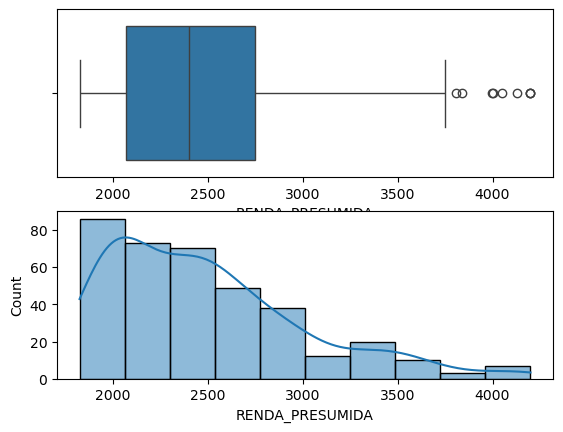

In [77]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

sns.boxplot(x="RENDA_PRESUMIDA", data=cadastroSemOutlier, ax=ax1)
sns.histplot(x="RENDA_PRESUMIDA", data=cadastroSemOutlier, bins=10, kde=True, ax=ax2)

plt.show()

Text(0.5, 0, 'RENDA_PRESUMIDA (R$)')

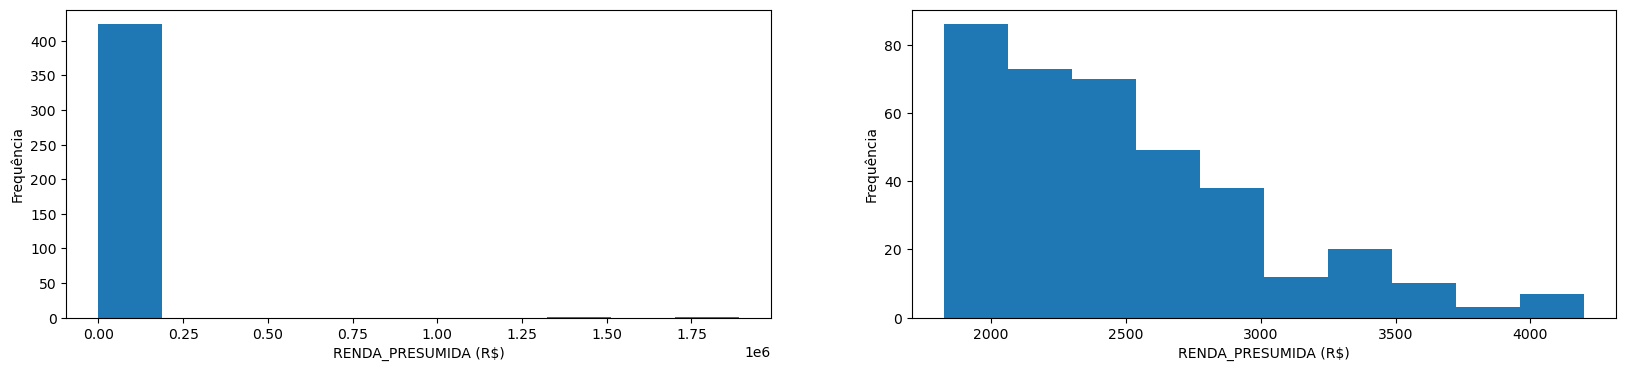

In [79]:
# Gráfico histograma
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,4))

plt.subplot(1,2,1)
plt.hist(cadastro['RENDA_PRESUMIDA'], bins=10)
plt.ylabel('Frequência')
plt.xlabel('RENDA_PRESUMIDA (R$)')
plt.subplot(1,2,2)
plt.hist(cadastroSemOutlier['RENDA_PRESUMIDA'], bins=10)
plt.ylabel('Frequência')
plt.xlabel('RENDA_PRESUMIDA (R$)')